In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string

In [3]:
articles = pd.read_csv('./../data/articles.csv', dtype={'article_id': 'str', 'product_code': 'str'})
customers = pd.read_csv('./../data/customers.csv')
sample_submission = pd.read_csv('./../data/sample_submission.csv')
transactions_train = pd.read_csv('./../data/transactions_train.csv', dtype={'article_id': 'str'})

## Utilities

In [4]:
def print_inconsistencies(dataset, pairs):
    for left, right in pairs:
        inconsistencies = get_inconsistencies(dataset, left, right)
        if not inconsistencies.empty:
            print(f"{left} - {right} pair has {len(inconsistencies)} inconsistencies.")
            print(inconsistencies)

def get_inconsistencies(dataset, left, right):
    # Drop duplicate pairs and select rows that contain duplicates in right column
    cols = dataset[[left, right]].drop_duplicates()
    inconsistencies = cols[cols.duplicated(right, keep=False)]
    return inconsistencies

# Example usage:
# print_inconsistencies(your_dataset, [("Column1", "Column2"), ("Column3", "Column4")])



# Articles

In [5]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
articles.tail()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105537,0953450001,0953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,0953763001,0953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,0956217002,0956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,0957375001,0957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.
105541,0959461001,0959461,Lounge dress,265,Dress,Garment Full body,1010016,Solid,11,Off White,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Calf-length dress in ribbed jersey made from a...


In [7]:
articles.describe()

,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


When describing the dataset, we look at the min value and notice that some columns have -1 as their min value. This maybe refers to uninitialized values.

In [8]:
print(articles.count())

article_id                      105542
product_code                    105542
prod_name                       105542
product_type_no                 105542
product_type_name               105542
product_group_name              105542
graphical_appearance_no         105542
graphical_appearance_name       105542
colour_group_code               105542
colour_group_name               105542
perceived_colour_value_id       105542
perceived_colour_value_name     105542
perceived_colour_master_id      105542
perceived_colour_master_name    105542
department_no                   105542
department_name                 105542
index_code                      105542
index_name                      105542
index_group_no                  105542
index_group_name                105542
section_no                      105542
section_name                    105542
garment_group_no                105542
garment_group_name              105542
detail_desc                     105126
dtype: int64


There's 105542 articles but when looking at the detail_desc field, we can see there's an inconsistency there.

In [9]:
print(articles.isna().sum())

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


When investigating the missing values, we see that there's 416 values.

In [10]:
print(articles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  object
 1   product_code                  105542 non-null  object
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [11]:
print(articles.nunique())

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64


When looking at the unique values, we can see that all the article id's are unique. Which should be the case as this is used as the identifier. The product_type_no and product_type_name should have the same unique values since they are linked with a one-to-one relationship. But as we saw with the describe function, product_type_no has atleast one -1 value, so maybe this is the reason for it.

department_no and department_name also do not have the same amount of unique values, and it is the same for section_no and section_name. These two do not contain negative values so there must be something else that went wrong.

Now we'll check these inconsistencies and see what went wrong.

In [12]:
pairs = {
    ("product_type_no", "product_type_name"),
    ("department_no", "department_name"),
    ("section_no", "section_name")

}
print_inconsistencies(articles,pairs)

section_no - section_name pair has 2 inconsistencies.
       section_no  section_name
38956           4  Ladies Other
43598          17  Ladies Other
product_type_no - product_type_name pair has 2 inconsistencies.
     product_type_no product_type_name
36               532          Umbrella
719               83          Umbrella
department_no - department_name pair has 71 inconsistencies.
       department_no           department_name
0               1676              Jersey Basic
16              5883              Jersey Basic
23              2032                    Jersey
28              4342  EQ & Special Collections
121             3509                     Belts
...              ...                       ...
11932           7520                  Knitwear
20908           3708                Loungewear
26661           1778         OL Extended Sizes
26948           3941               Accessories
34641           7952            Jersey License

[71 rows x 2 columns]


# Customers

In [13]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [14]:
customers.tail()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
1371979,ffffd9ac14e89946416d80e791d064701994755c3ab686...,NaN,NaN,PRE-CREATE,NONE,65.0,0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...


When viewing the columns, we can see a weird pattern where there's alnot of NaN values.

In [15]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


FN and Active are boolean values, and all of the ages seem normal and range from 16 to  99.

In [16]:
print(customers.count())

customer_id               1371980
FN                         476930
Active                     464404
club_member_status        1365918
fashion_news_frequency    1355969
age                       1356119
postal_code               1371980
dtype: int64


There's alot of missing values with 1371980 unique customers. Lets investigate.

In [17]:
print(customers.isna().sum())

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64


Upon investigating, we see that alot of the missing values come from boolean the columns FN and Active. The age column has a large amount of missing values aswell, which is weird. Thhe club_member_status and fashion_news_frequency has a large amount of missing values aswell, maybe these columns were added later on.

In [18]:
print(customers.nunique())

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          3
age                            84
postal_code                352899
dtype: int64


Everything seems ok here. Confirming what was already said with the club_member_status and fashion_news_frequency having 3 unique values and NaN values.

In [19]:
print(customers['FN'].value_counts(dropna=False, normalize=True))
print()
print(customers['Active'].value_counts(dropna=False, normalize=True))
print()
print(customers['club_member_status'].value_counts(dropna=False, normalize=True))
print()
print(customers['fashion_news_frequency'].value_counts(dropna=False, normalize=True))

FN
NaN    0.652378
1.0    0.347622
Name: proportion, dtype: float64

Active
NaN    0.661508
1.0    0.338492
Name: proportion, dtype: float64

club_member_status
ACTIVE        0.927485
PRE-CREATE    0.067756
NaN           0.004418
LEFT CLUB     0.000340
Name: proportion, dtype: float64

fashion_news_frequency
NONE         0.639740
Regularly    0.347976
NaN          0.011670
Monthly      0.000614
Name: proportion, dtype: float64


The NaN in fashion_news_frequency can be filled with NONE, and the NaN in club_member_status is a bit trickier, since it could be any of the 3 unique values.

With Active and FN we can replace the NaN's with 0 to complete the boolean attribute.

In [20]:
print(customers['age'].value_counts(dropna=False))

age
21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: count, Length: 85, dtype: int64


There aren't many elderly people on H&M, most of the customers are between 20-30 years.

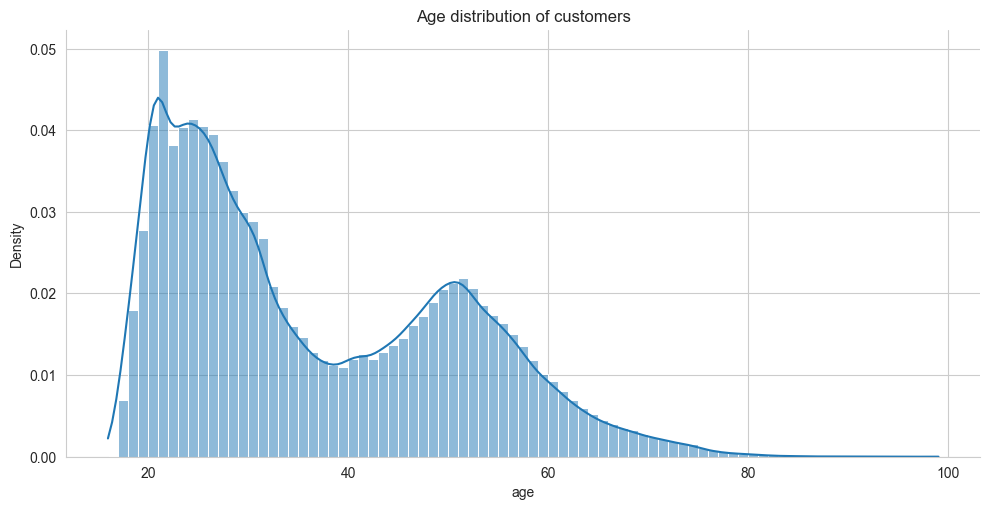

In [21]:
sns.set_style("whitegrid")
sns.displot(customers, x="age", kde=True, height=5, aspect=2, stat="density", bins=int(customers.age.max()-customers.age.min())).set(title="Age distribution of customers")

<Axes: xlabel='age'>

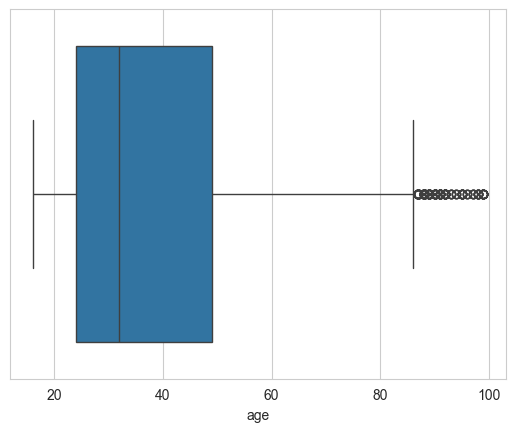

In [22]:
sns.boxplot(x=customers.age)


In [23]:
print(customers.postal_code.value_counts(dropna=False))

postal_code
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: count, Length: 352899, dtype: int64


There is something weird going on with the postal_codes, where 120303 customers have the same postal code. Can this this be viewed as a default value maybe?

# Transactions

In [24]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [25]:
transactions_train.tail()

,t_dat,customer_id,article_id,price,sales_channel_id
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,0898573003,0.033881,2


Only 5 columns and each transaction is linked to 1 article

In [26]:
transactions_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,price,sales_channel_id
count,31788324.00000,31788324.00000
mean,0.02783,1.70403
std,0.01918,0.45648
min,0.00002,1.00000
25%,0.01581,1.00000
50%,0.02541,2.00000
75%,0.03388,2.00000
max,0.59153,2.00000


The price format seems a bit weird, let's pull up a graph to get a better look.

[Text(0.5, 1.0, 'Price distribution of transactions')]

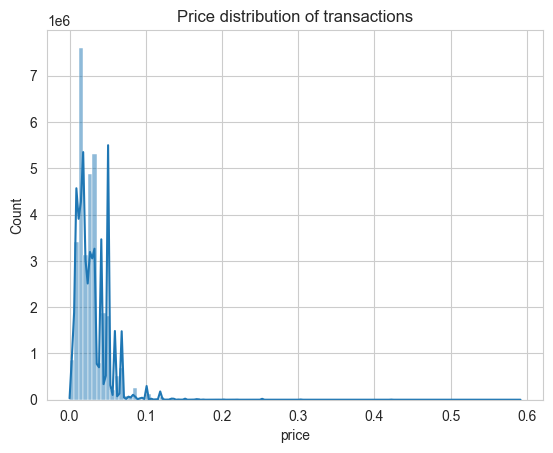

In [27]:
sns.set_style("whitegrid")
sns.histplot(transactions_train.price, bins=100, kde=True).set(title="Price distribution of transactions")

The distribution is still very weird, but we can see that most of the articles have a price between 0 and 0.05

In [28]:
print(transactions_train.isna().sum())

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


In [29]:
print(transactions_train.nunique())

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64


1,362,281 customers over a span of 2 years with no missing values. Everything seems correct here. The only weird thing is the price format.

# Sample submission

In [30]:
sample_submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [31]:
sample_submission.tail()

,customer_id,prediction
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...
1371979,ffffd9ac14e89946416d80e791d064701994755c3ab686...,0706016001 0706016002 0372860001 0610776002 07...


In [32]:
print(sample_submission.count())

customer_id    1371980
prediction     1371980
dtype: int64


In [33]:
print(sample_submission.isna().sum())

customer_id    0
prediction     0
dtype: int64


No missing values, that's good.

In [34]:
print(sample_submission.nunique())

customer_id    1371980
prediction           1
dtype: int64


Only one prediction for all of the customers

In [35]:
print(sample_submission.prediction.value_counts())

prediction
0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001    1371980
Name: count, dtype: int64
